# Kaggle: Dogs Vs Cats
# Not a very efficient network as I am running these on my macbook

In [30]:
import os,shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker
import seaborn as sns
%matplotlib inline

In [2]:
from keras.models import Sequential
from keras.layers import Input,Dropout,Flatten,Conv2D,Activation,MaxPooling2D,Dense
from keras.optimizers import RMSprop
from keras.callbacks import ModelCheckpoint,Callback,EarlyStopping
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator,array_to_img, img_to_array,load_img

Using TensorFlow backend.


In [3]:
#Preparing the data
root = os.getcwd()
root

'/Users/ram'

In [4]:
# Location of the train and test folders
train_dir = os.path.join(root,'Desktop','DS-PRACTICE-PYTHON','DEEPNN','Cat_Vs_Dog','train')
test_dir = os.path.join(root,'Desktop','DS-PRACTICE-PYTHON','DEEPNN','Cat_Vs_Dog','test1')

In [5]:
#os.listdir(train_dir) # prints all the files/dirs in the path
print('Total images in Train set: {}'.format(len(os.listdir(train_dir))))
print('Total images in Test set: {}'.format(len(os.listdir(test_dir))))

Total images in Train set: 25000
Total images in Test set: 12500


In [9]:
# Checking how does the train and test file names looks like
train_files = os.listdir(train_dir)
test_files = os.listdir(test_dir)
print(len(train_files))
print(len(test_files))
print('train_fmt:',train_files[1])
print('test_fmt:',test_files[20])
#img_to_array(test_files[20]).shape

25000
12500
train_fmt: cat.5077.jpg
test_fmt: 189.jpg


In [10]:
# As I am intended to use ".flow_from_directory()", rather than reading all the files,
# here I am separating the dogs and cats into separate subfolders
# due to the processing issues, I am only using a 2000 (1000+1000) cats/dogs list from 
# train; 1000(500+500) cats/dogs train train as validation set; 1000 from test set

train_cat = []
train_dog = []
test_cat = []
test_dog = []

for i in range(len(train_files)):
    cat_dog,num,jpg = train_files[i].split('.')
    if cat_dog == 'cat':
        cat = cat_dog+'.'+num+'.'+jpg
        train_cat.append(cat)
    elif cat_dog == 'dog':
        dog = cat_dog+'.'+num+'.'+jpg
        train_dog.append(dog)

train_cat_sub = train_cat[0:1000]
train_dog_sub = train_dog[0:1000]
val_cat = train_cat[1000:1500]
val_dog = train_dog[1000:1500]
test = test_files[0:1000]

print('train_cat:',len(train_cat_sub))
print('train_dog:',len(train_dog_sub))
print('val_cat:',len(val_cat))
print('val_dog:', len(val_dog))
print('test:',len(test))

train_cat: 1000
train_dog: 1000
val_cat: 500
val_dog: 500
test: 1000


In [11]:
# creating the relavant subfolders for cats and dogs

train_sub = '/Users/ram/Desktop/DS-PRACTICE-PYTHON/DEEPNN/Cat_Vs_Dog/train_sub'
val_sub = '/Users/ram/Desktop/DS-PRACTICE-PYTHON/DEEPNN/Cat_Vs_Dog/val_sub'
test_sub = '/Users/ram/Desktop/DS-PRACTICE-PYTHON/DEEPNN/Cat_Vs_Dog/test_sub'
train_sub_cats = '/Users/ram/Desktop/DS-PRACTICE-PYTHON/DEEPNN/Cat_Vs_Dog/train_sub/cats'
train_sub_dogs = '/Users/ram/Desktop/DS-PRACTICE-PYTHON/DEEPNN/Cat_Vs_Dog/train_sub/dogs'
val_sub_cats = '/Users/ram/Desktop/DS-PRACTICE-PYTHON/DEEPNN/Cat_Vs_Dog/val_sub/cats'
val_sub_dogs = '/Users/ram/Desktop/DS-PRACTICE-PYTHON/DEEPNN/Cat_Vs_Dog/val_sub/dogs'
os.makedirs(train_sub, exist_ok = True)
os.makedirs(val_sub,exist_ok=True)
os.makedirs(test_sub,exist_ok=True)
os.makedirs(train_sub_cats, exist_ok=True)
os.makedirs(train_sub_dogs, exist_ok=True)
os.makedirs(val_sub_cats, exist_ok=True)
os.makedirs(val_sub_dogs, exist_ok=True)

In [13]:
# copying the data from original train/test folders to the newly created subfolders

for _ in range(len(train_cat_sub)):
    shutil.copy(train_dir+'/'+train_cat_sub[_],train_sub_cats)
for _ in range(len(train_dog_sub)):
    shutil.copy(train_dir+'/'+train_dog_sub[_],train_sub_dogs)
for _ in range(len(val_cat)):
    shutil.copy(train_dir+'/'+val_cat[_],val_sub_cats)
for _ in range(len(val_dog)):
    shutil.copy(train_dir+'/'+val_dog[_],val_sub_dogs)
for _ in range(len(test)):
    shutil.copy(test_dir+'/'+test[_],test_sub)
    
print(len(os.listdir(train_sub_cats)))
print(len(os.listdir(train_sub_dogs)))
print(len(os.listdir(val_sub_cats)))
print(len(os.listdir(val_sub_dogs)))
print(len(os.listdir(test_sub)))

1000
1000
550
550
1000


In [31]:
# Defining the Convnet

model = Sequential()
model.add(Conv2D(32,(3,3), padding='valid',input_shape=(150,150,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
activation_3 (Activation)    (None, 148, 148, 32)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
activation_4 (Activation)    (None, 72, 72, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 128)       73856     
__________

# Data Preprocessing (No data augmentation)

In [18]:
train_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [125]:
# for checking the dimensions of an image
img = load_img('/Users/ram/Desktop/DS-PRACTICE-PYTHON/DEEPNN/Cat_Vs_Dog/train_sub/cat.6.jpg') # This is a PIL image
x = img_to_array(img) # converts the image to a numpy array
x.shape

(303, 400, 3)

In [20]:
# defining a train_generator
train_generator = train_datagen.flow_from_directory(
                    '/Users/ram/Desktop/DS-PRACTICE-PYTHON/DEEPNN/Cat_Vs_Dog/train_sub',
                    target_size = (150,150),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [21]:
# defining a validation_generator
validation_generator = validation_datagen.flow_from_directory(
                '/Users/ram/Desktop/DS-PRACTICE-PYTHON/DEEPNN/Cat_Vs_Dog/val_sub',
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')

Found 1100 images belonging to 2 classes.


In [22]:
# running the model

history = model.fit_generator(
            train_generator,
            #callbacks = callbacks,
            samples_per_epoch=100,
            nb_epoch=20,
            validation_data=validation_generator,
            validation_steps=50)

/Users/ram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/Users/ram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., validation_steps=50, steps_per_epoch=5, epochs=20)`
  


Epoch 1/20
5/5 [==============================] - 37s 7s/step - loss: 1.1778 - acc: 0.4900 - val_loss: 0.6927 - val_acc: 0.5230
Epoch 2/20
5/5 [==============================] - 36s 7s/step - loss: 0.6961 - acc: 0.5000 - val_loss: 0.6944 - val_acc: 0.4960
Epoch 3/20
5/5 [==============================] - 36s 7s/step - loss: 0.6899 - acc: 0.5700 - val_loss: 0.6946 - val_acc: 0.5100
Epoch 4/20
5/5 [==============================] - 36s 7s/step - loss: 0.7007 - acc: 0.5100 - val_loss: 0.6936 - val_acc: 0.4950
Epoch 5/20
5/5 [==============================] - 37s 7s/step - loss: 0.6961 - acc: 0.4200 - val_loss: 0.6916 - val_acc: 0.5330
Epoch 6/20
5/5 [==============================] - 37s 7s/step - loss: 0.6904 - acc: 0.5500 - val_loss: 0.6908 - val_acc: 0.4990
Epoch 7/20
5/5 [==============================] - 37s 7s/step - loss: 0.6958 - acc: 0.4500 - val_loss: 0.6913 - val_acc: 0.4800
Epoch 8/20
5/5 [==============================] - 38s 8s/step - loss: 0.7075 - acc: 0.4500 - val_loss: 0

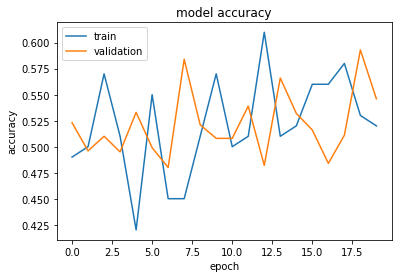

In [23]:
# Summarizing the Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [ ]:
# Clearly by increasing the numer of epochs and tuning the network will help 

In [24]:
# Data Augmentation also can be helpful here

train_datagen_aug = ImageDataGenerator(
                    rescale = 1./255,
                    rotation_range = 40,
                    width_shift_range = 0.2,
                    height_shift_range = 0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode = 'nearest')

In [25]:
train_generator_aug = train_datagen_aug.flow_from_directory(
                    '/Users/ram/Desktop/DS-PRACTICE-PYTHON/DEEPNN/Cat_Vs_Dog/train_sub',
                    target_size = (150,150),
                    batch_size=20,
                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [27]:
validation_generator_aug = validation_datagen.flow_from_directory(
                '/Users/ram/Desktop/DS-PRACTICE-PYTHON/DEEPNN/Cat_Vs_Dog/val_sub',
                target_size=(150,150),
                batch_size=20,
                class_mode='binary')

Found 1100 images belonging to 2 classes.


In [28]:
history_aug = model.fit_generator(
            train_generator_aug,
            #callbacks = callbacks,
            samples_per_epoch=100,
            nb_epoch=20,
            validation_data=validation_generator_aug,
            validation_steps=50)

/Users/ram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  import sys
/Users/ram/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., validation_data=<keras.pre..., validation_steps=50, steps_per_epoch=5, epochs=20)`
  import sys


Epoch 1/20
5/5 [==============================] - 36s 7s/step - loss: 0.6906 - acc: 0.5400 - val_loss: 0.6886 - val_acc: 0.4950
Epoch 2/20
5/5 [==============================] - 36s 7s/step - loss: 0.6858 - acc: 0.5700 - val_loss: 0.6688 - val_acc: 0.5840
Epoch 3/20
5/5 [==============================] - 36s 7s/step - loss: 0.6765 - acc: 0.5900 - val_loss: 0.6671 - val_acc: 0.6050
Epoch 4/20
5/5 [==============================] - 37s 7s/step - loss: 0.7587 - acc: 0.5400 - val_loss: 0.6847 - val_acc: 0.5770
Epoch 5/20
5/5 [==============================] - 37s 7s/step - loss: 0.6837 - acc: 0.5300 - val_loss: 0.6733 - val_acc: 0.6010
Epoch 6/20
5/5 [==============================] - 37s 7s/step - loss: 0.6774 - acc: 0.5400 - val_loss: 0.6582 - val_acc: 0.6220
Epoch 7/20
5/5 [==============================] - 38s 8s/step - loss: 0.7077 - acc: 0.6100 - val_loss: 0.6762 - val_acc: 0.5910
Epoch 8/20
5/5 [==============================] - 38s 8s/step - loss: 0.6891 - acc: 0.5500 - val_loss: 0

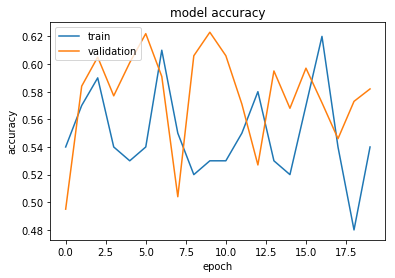

In [29]:
# Summarizing the Accuracy
plt.plot(history_aug.history['acc'])
plt.plot(history_aug.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [ ]:
# clearly the number of epochs needed to be increased and layer tuning is required.